<h2> Forest Fire Data Analysis </h2>
<p>
    The purpose of this notebook is to act as data visualization for the dataset about forest fires in Montesinho Natural Park, Portugal. This dataset and a further scientific analysis was written about and analyzed in the paper: 
    <blockquote> 
        <i> A Data Mining Approach to Predict Forest Fires using Meteorological Data by Paulo Cortez and A. Morais</i>.
    </blockquote> 
This notebook serves as an extension of this papers analysis.
</p>
<p>
    In this notebook, we will use NumPy and Pandas for scientific data handling paired with Matplotlib using Seaborn for data visualziation. We will look through and preprocess the dataset, understand the dataset parameters, visualize the region of area this data was drawn from, and finally visualize it using Seaborn Heatmaps.
</p>

<br>
<p>
    Full Citation: <br>
    <i> 
        P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence,
Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December,
Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.
    </i>
</p>

In [9]:
# Data handling
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colormaps

In [10]:
# Read in dataset
data = pd.read_csv("forestfires.csv")

In [11]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,4.662162,4.293436,90.644595,110.742664,548.208301,9.017181,18.880888,44.266409,4.012355,0.021622,12.822490
std,2.317154,1.237235,5.514770,64.052544,247.901364,4.556208,5.804067,16.309224,1.793897,0.295674,63.596731
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,63.875000,438.500000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,41.500000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.125000,713.900000,10.775000,22.800000,53.000000,4.900000,0.000000,6.562500
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<h2> Forest Weather Index (FWI) </h2>

<p>
    The dataset provided has eleven parameters that describe the location, weather conditions, and, consequently, the amount of area that was burned as a result from forest fires. To understand these parameters, we need to understand the Forest Weather Index (FWI). The FWI is a <i> "Canadian system for rating fire danger" </i> composed of the following six components.
</p>
<ul>
    <li>FFMC (Fine Fuel Moisture Code): denote the moisture content surface litter and influences ignition and fire spread</li>
    <li>DMC (Duff Moisture Code): denotes the moisture content code of shallow organic layers - combines with the DC. </li>
    <li>DC (Drought Code): denotes the moisture content code of deep organic layers - combines with the DMC. </li>
    <li>ISI (Initial Spread Index): a score that correlates with fire velocity spread.</li>
    <li>BUI (Buildup Index): the amount of available fuel. </li>
    <li>FWI (Forest Weather Index): an indicator of fire intensity composed from ISI and BUI.</li>
</ul>

<p>These codes can be visualized with the following diagram:</p>
<img src="Forest_Fire_Index_Visual.png" width=405 height=311 />

<h2> Data Interpretation </h2>
<p>
    In addition to the Forest Weather Index related values, we have measured values that indicate meteorological data across the park.
</p>
<ul>
    <li>X, Y: denotes the X,Y coordinate of where the data was measured (more below) </li>
    <li>temp: the temperature measured in Celsius (C°).</li>
    <li>wind: the wind speed measured in kilometres per hour (km/h) </li>
    <li>rain: the amount of rain outside measured in millimetres per area (mm/m<sup>2</sup>) </li>
    <li>area: the amount of area burned by forest fires in hectars (HA) </li>
    <li>FWI (Forest Weather Index): an indicator of fire intensity composed from ISI and BUI.</li>
</ul>

<p> 
    This data in combonation with the aforementioned Forest Weather Index information is what we will use for further data processing, visualizations, and eventually a predictive model.
</p>

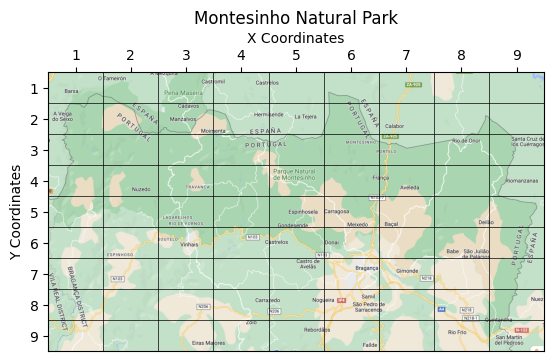

In [12]:
# Reference image
img = mpimg.imread("Montesinho Natural Park Nov 2023 .png")

# Subplots
fig, ax = plt.subplots()
ax.imshow(img)

grid_rows = 9
grid_cols = 9

# Determine the width and height of each cell in grid
cell_width = img.shape[1] / grid_cols
cell_height = img.shape[0] / grid_rows

# Draw grid lines
for i in range(grid_cols + 1):
    x = i * cell_width
    ax.axvline(x, color='black', linewidth=0.5)

for i in range(grid_rows + 1):
    y = i * cell_height
    ax.axhline(y, color='black', linewidth=0.5)

# Set the axis limits to match the image size
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)

# Set axis ticks
ax.set_xticks([cell_width / 2 + i * cell_width for i in range(grid_cols)])
ax.set_xticklabels([str(i + 1) for i in range(grid_cols)])
ax.set_yticks([cell_height / 2 + i * cell_height for i in range(grid_rows)])
ax.set_yticklabels([str(i + 1) for i in range(grid_rows)])

# Set axis labels
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.xaxis.set_label_position('top') 
ax.set_title('Montesinho Natural Park')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')

plt.show()

<h2> Map of Montesinho Natural Park </h2>
<p>
    The image built above shows how Paulo Cortez and A. Morais in their referenced papers divided up Montesinho Natural Park. Due to the park not fully encapsulating the graph, we expect to see greater amounts of data and greater quality of data towards the middle of the park.
</p>

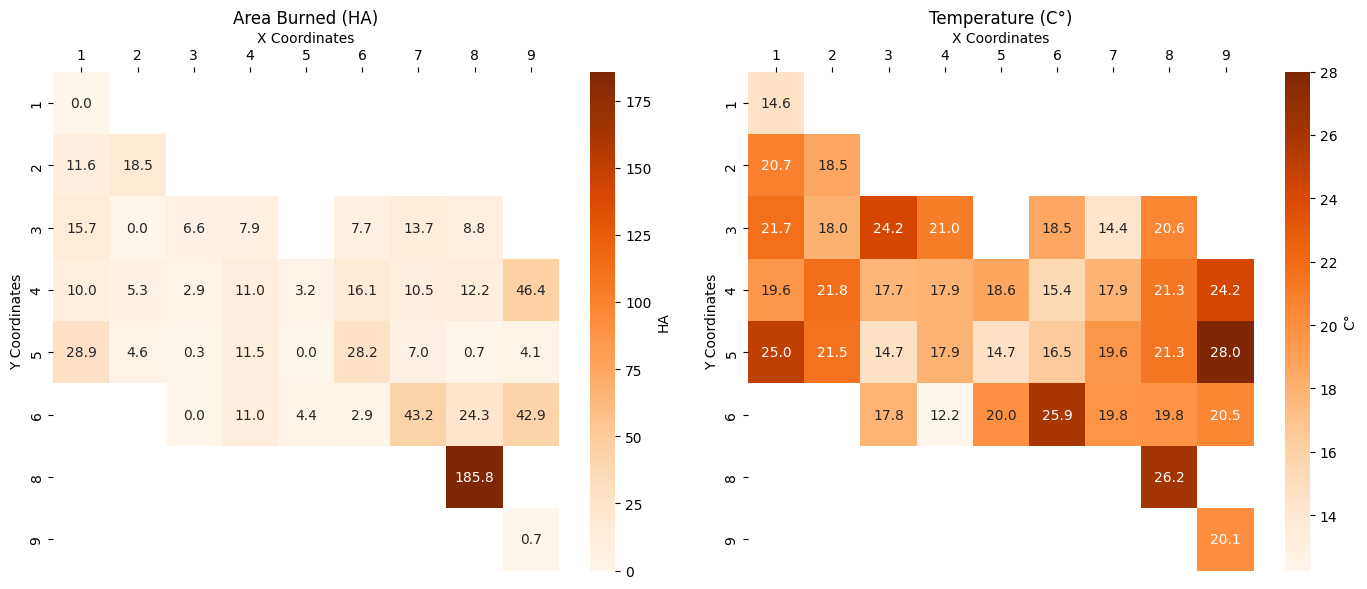

In [14]:
# Get information from data set
x_coordinates = data["X"]
y_coordinates = data["Y"]
area_values = data["area"]
temp_values = data["temp"]
wind_values = data["wind"]
humidity_values = data["RH"]

# Package data into pivot table
area_heatmap_data = data.pivot_table(values='area', index='Y', columns='X')
temp_heatmap_data = data.pivot_table(values='temp', index='Y', columns='X')
wind_heatmap_data = data.pivot_table(values='wind', index='Y', columns='X')
humidity_heatmap_data = data.pivot_table(values='RH', index='Y', columns='X')

# Prepare subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ax1, ax2 = axs.flatten()

# Plot sublots
ax1.set_title('Area Burned (HA)')
sns.heatmap(area_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", cbar_kws={'label': 'HA'}, ax=ax1)

ax2.set_title('Temperature (C°)')
sns.heatmap(temp_heatmap_data, cmap='Oranges', annot=True, fmt=".1f", cbar_kws={'label': 'C°'}, ax=ax2)

for ax in [ax1, ax2]:
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('X Coordinates')
    ax.set_ylabel('Y Coordinates')

plt.tight_layout()

plt.show()

<h2> Area Burned (HA) and Temperature (C°) </h2>
<p>
    Now that our data is processed, we can begin with some simple visualizations for the data across the park. Our first two heatmaps show the area burned in hectars across the park and the temperature across the park. There are several conclusions we can draw:
</p>
<ol>
    <li>The average annual temperature in Montesinho Natural Park is around 8°C to 12°C, whereas the <b>lowest</b> temperature found in our heatmap is 12.2°C, while the highest is 28.0°C. This clearly shows the affects that forest fires in this area have drawn to the surrounding climate.</li>
    <li>There are no obvious trends that we can deduce from either heatmap - the data seems to be hard to predict and random.</li>
</ol>

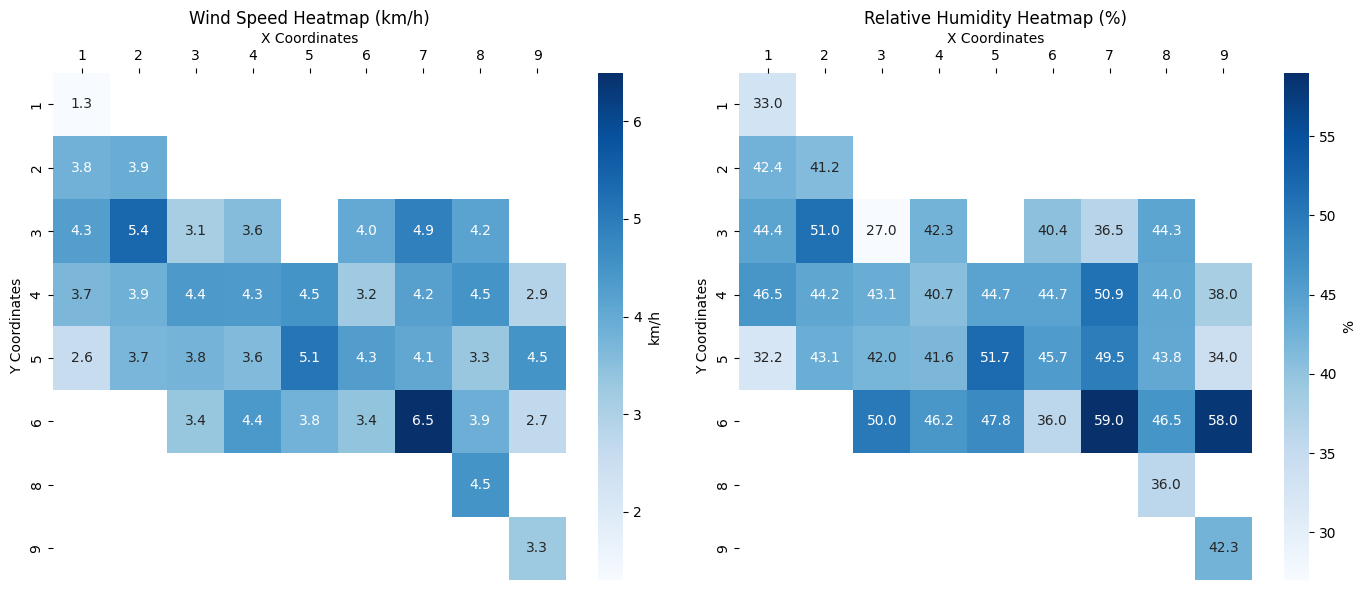

In [15]:
# Prepare subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ax3, ax4 = axs.flatten()

ax3.set_title('Wind Speed Heatmap (km/h)')
sns.heatmap(wind_heatmap_data, cmap='Blues', annot=True, fmt=".1f", cbar_kws={'label': 'km/h'}, ax=ax3)

ax4.set_title('Relative Humidity Heatmap (%)')
sns.heatmap(humidity_heatmap_data, cmap='Blues', annot=True, fmt=".1f", cbar_kws={'label': '%'}, ax=ax4)

for ax in [ax3, ax4]:
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('X Coordinates')
    ax.set_ylabel('Y Coordinates')

plt.tight_layout()

plt.show()

<h2> Wind Speed (km/h) and Relative Humidity (%) </h2>
<p>
    Here, we are comparing the wind speed and relative humidity of the park. We can make the following observations:
</p>
<ol>
    <li>There tends to be a general correlation between both wind speed and relative humidity. Many cells exhibit similar percent-based values in reference to their respective scales that tend to correlate nicely. This could be explained by many factors that are not abundantly clear.</li>
    <li>Areas affected by high amounts of forest fire damage are often in areas with high relative humidity percentages.</li>
</ol>

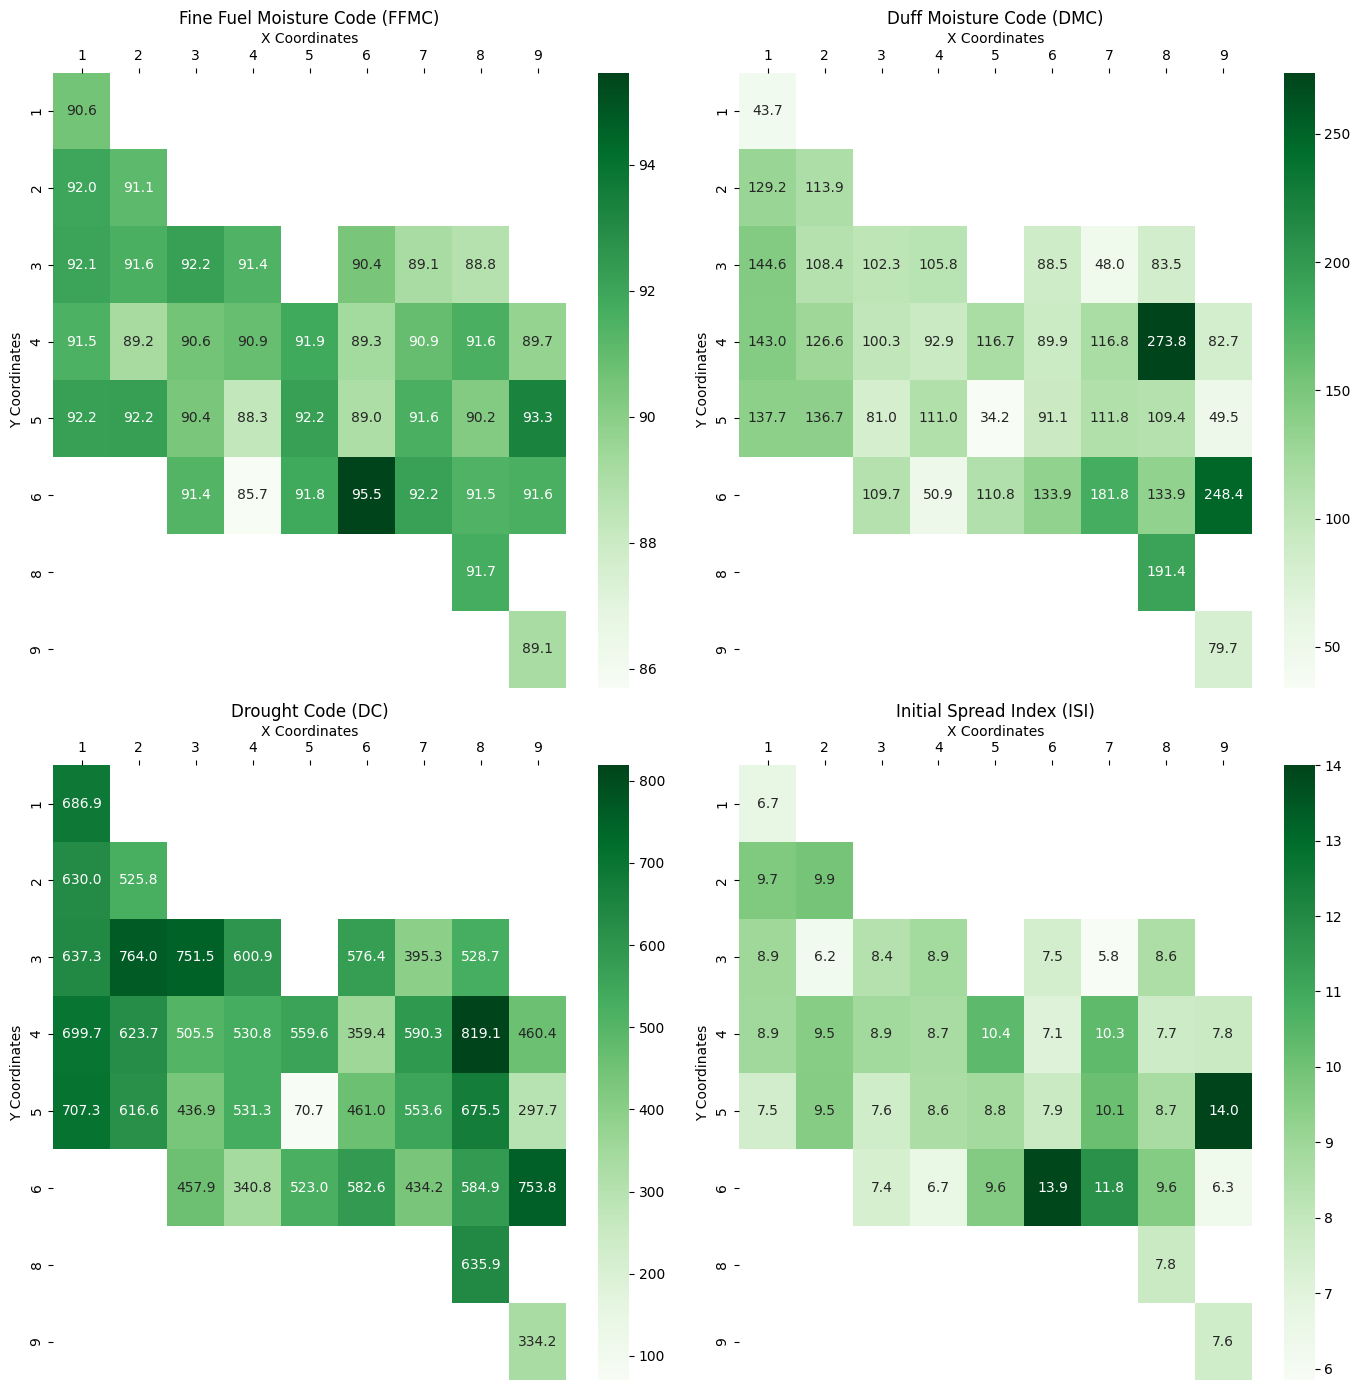

In [242]:
# Get information from data set
ffmc_values = data["FFMC"]
dmc_values = data["DMC"]
dc_values = data["DC"]
isi_values = data["ISI"]

# Package data into pivot table
ffmc_heatmap_data = data.pivot_table(values='FFMC', index='Y', columns='X')
dmc_heatmap_data = data.pivot_table(values='DMC', index='Y', columns='X')
dc_heatmap_data = data.pivot_table(values='DC', index='Y', columns='X')
isi_heatmap_data = data.pivot_table(values='ISI', index='Y', columns='X')

# Prepare subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
ax5, ax6, ax7, ax8 = axs.flatten()

# Plot sublots
ax5.set_title('Fine Fuel Moisture Code (FFMC)')
sns.heatmap(ffmc_heatmap_data, cmap='Greens', annot=True, fmt=".1f", ax=ax5)

ax6.set_title('Duff Moisture Code (DMC)')
sns.heatmap(dmc_heatmap_data, cmap='Greens', annot=True, fmt=".1f", ax=ax6)

ax7.set_title('Drought Code (DC)')
sns.heatmap(dc_heatmap_data, cmap='Greens', annot=True, fmt=".1f", ax=ax7)

ax8.set_title('Initial Spread Index (ISI)')
sns.heatmap(isi_heatmap_data, cmap='Greens', annot=True, fmt=".1f", ax=ax8)


for ax in [ax5, ax6, ax7, ax8]:
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('X Coordinates')
    ax.set_ylabel('Y Coordinates')

plt.tight_layout()

plt.show()

<h2> Forest Weather Index Visualizations </h2>
<p>
    Finally, we can observe general trends in FFMC, DMC, DC, and ISI through the park with the following heatmaps. We can consequently make the following observations:
</p>
<ol>
    <li>The Drought Code tends to grow larger towards the edges of the park, whereas the center tends to be dryer. This dryer atmosphere in the middle of the park may lead to a greater chance of forest fires spawning and growing exponentially. </li>
    <li>The Duff Moisture Code and Drought Code tend to correlate to similar heatmaps. This is confirming of their relation, as one measures shallow moisture, while the other measures deep moisture.</li>
    <li>The Fine Fuel Moisture Code generally tends to be greater towards the west part of the park.</li>
</ol>

<h2> Concluding Thoughts </h2>
<p>
    The analysis and work done by Paulo Cortez and A. Morais in their paper <i> A Data Mining Approach to Predict Forest Fires using Meteorological Data </i> is very impressive, useful, and can be of great help to the future of forest fire fighting. As we have seen, this data be can visualized in meaningful ways, and will be furthered processed to generate a forest fire predictive model.
</p>
<p>
    This dataset could be improved by more frequent tests, greater area coverage, and generally a larger pool of data to work from. However, because this would likely require a larger team and greater funding, this study is a great first foot in the door towards preventing forest fires with the power of deep learning.
</p>
